# Intalação dos pacotes

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import pairwise_distances

In [2]:
def print_cluster_info(c, number):
    grupo = pd.DataFrame({'topic':dfc_sc.columns, 'value': centers[c]}).sort_values(by='value')
    fig, ax = plt.subplots(figsize=(7,10))
    grupo.plot(kind='barh', x='topic', y='value', legend = False, ax=ax, color='red')
    ax.set_xlabel('Relevância para o grupo')
    ax.set_ylabel('Tópicos')
    ax.set_title('Tópicos relevantes para o grupo '+str(c)+' que possui '+str(number[c])+" elementos")

In [3]:
def cluster_quality(df, centers, cluster):
    temp = df[df['label'] == cluster]
    temp = temp.drop(columns=['label'])
    dist = pairwise_distances(temp, centers[cluster].reshape(1, -1))
    return cluster, np.mean(dist), np.std(dist)

# Leitura dos dados e análise descritiva

In [4]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/fbarth/ds-saint-paul/master/data/snsdata.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [5]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
df.shape

(30000, 40)

* Existem muitos valores faltantes? Quais são os atributos mais impactados? 

In [7]:
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
df['gradyear'].value_counts()

2006    7500
2007    7500
2008    7500
2009    7500
Name: gradyear, dtype: int64

Text(0.5, 1.0, 'Quantidade de usuários por sexo')

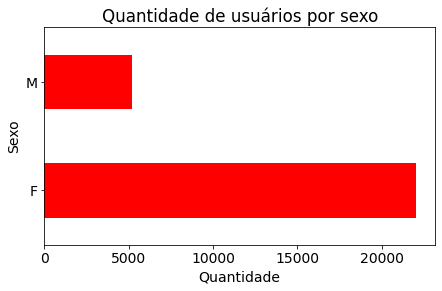

In [10]:
fig, ax = plt.subplots(figsize=(7,4))
df['gender'].value_counts().plot(kind='barh', legend = False, ax=ax, color='red')
ax.set_xlabel('Quantidade')
ax.set_ylabel('Sexo')
ax.set_title('Quantidade de usuários por sexo')

In [11]:
df['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

<AxesSubplot:ylabel='Frequency'>

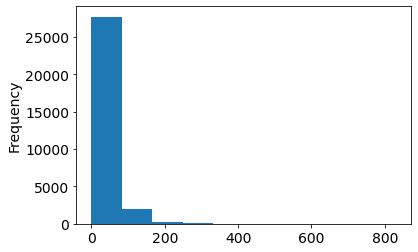

In [12]:
df['friends'].plot(kind='hist')

Este é um comportamento bem normal em redes sociais. Chamado de *long tail*. Poucas pessoas tem muitos amigos e muitas pessoas têm poucos amigos

In [13]:
df['age'].describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

O atributo age não é confiável

# Pré-processamento

Vamos agrupar (clusterizar) as pessoas levando-se em consideração apenas o conteúdo produzido

In [14]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [15]:
dfc = df[['basketball', 'football','soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']]

In [16]:
dfc.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [17]:
dfc.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [18]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#min_max_scaler.fit(dfc)
#dfc_sc = pd.DataFrame(min_max_scaler.transform(dfc))
#dfc_sc.columns = dfc.columns

from sklearn.preprocessing import scale
dfc_sc = pd.DataFrame(scale(dfc))
dfc_sc.columns = dfc.columns

In [19]:
dfc_sc.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,-3.789561e-17,3.789561e-18,-2.889540e-17,-2.842171e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,3.046682e+01,2.884728e+01,2.517666e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


# Modelagem

In [20]:
from sklearn.cluster import KMeans

In [21]:
result = pd.DataFrame(columns=['k','inertia','diff'])
anterior = 0
for k in range(1,15):
    k_means = KMeans(n_clusters=k, n_init=100)
    k_means.fit(dfc_sc)
    result = result.append({'k': k, 'inertia': k_means.inertia_, 'diff': (anterior - k_means.inertia_)}, ignore_index=True)
    anterior = k_means.inertia_

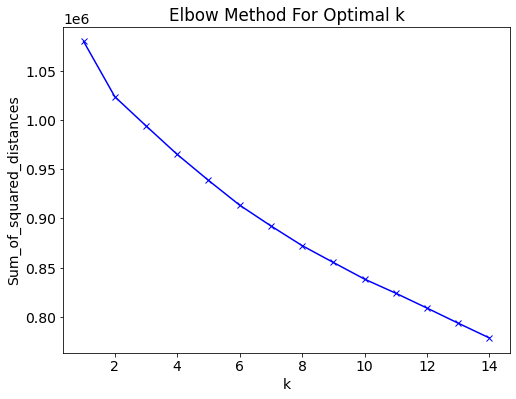

In [22]:
plt.subplots(figsize=(8,6))
plt.plot(result['k'], result['inertia'], 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* O método elbow é utilizado para identificar o número de clusters de um dataset (https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Infelizmente, o *elbow* normalmente exemplificado na literatura é difícil de ser encontrado na maioria dos datasets. O que faz com que a escolhe do número ideal de clusters sejá de fato subjetiva.

**Vamos criar um modelo com 6 segmentos**

In [23]:
k_means = KMeans(n_clusters=6, n_init=100)
k_means.fit(dfc_sc)
centers = k_means.cluster_centers_

Apresenta a quantidade de pessoas por cluster:

In [24]:
import collections
number = collections.Counter(k_means.labels_)
number

Counter({1: 21540, 5: 5942, 2: 1039, 3: 873, 0: 605, 4: 1})

# Resultados

Abaixo é apresentado 1 gráfico por cluster. No eixo Y deste gráfico estão todos os tópicos e no eixo X o valor médio daquele tópico naquele cluster. Quanto maior a barra para o lado direito então significa que aquele grupo fala muito sobre aquele tópico se comparado aos demais clusters. Quanto maior a barra para o lado esquerdo então significa que este grupo fala pouco sobre aquele assunto se comparado aos demais clusters.

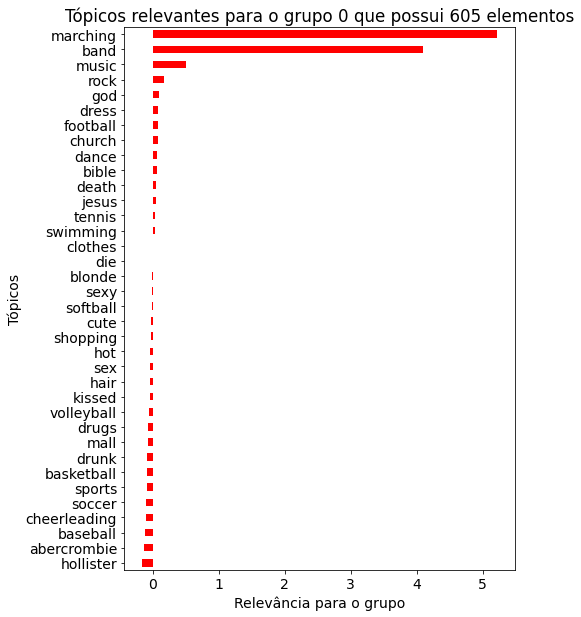

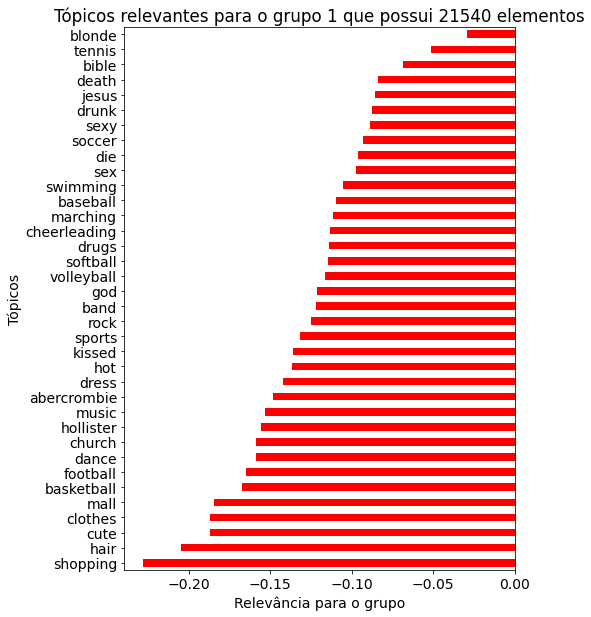

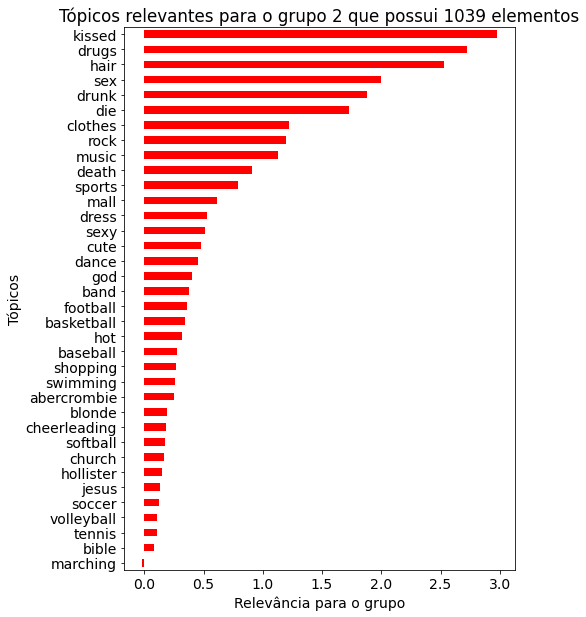

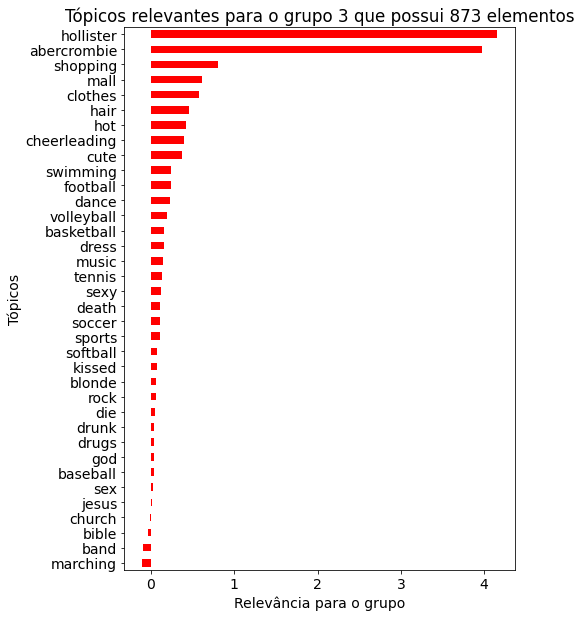

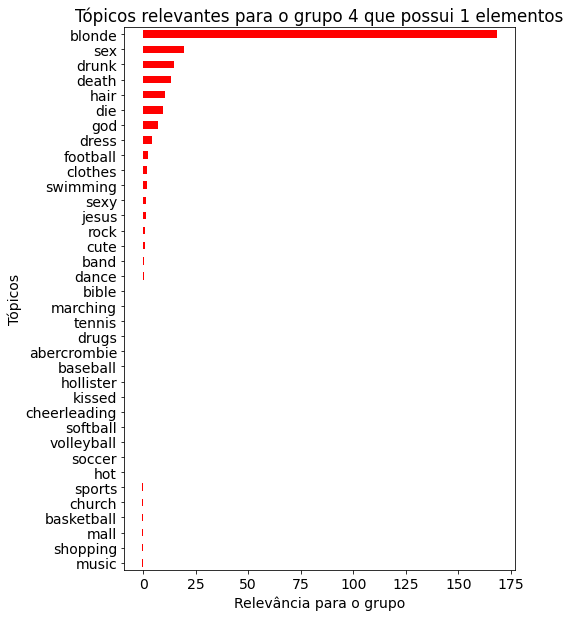

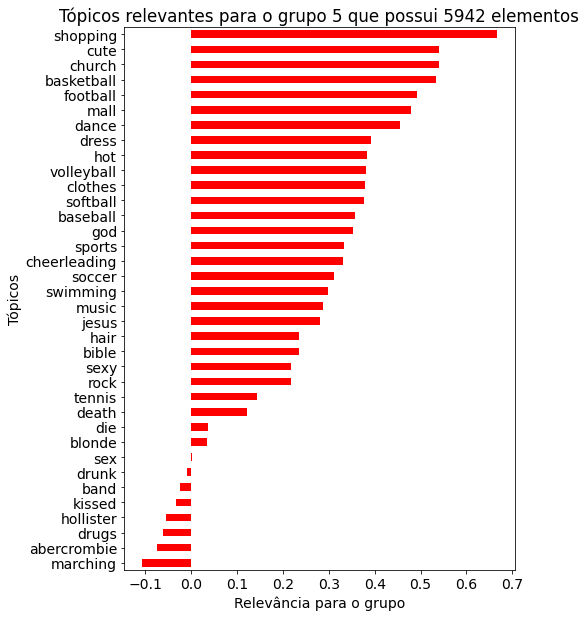

In [25]:
for c in range(0,centers.shape[0]):
    print_cluster_info(c, number)

Depois de identificados os agrupamentos, podemos adicionar esta informação no dataset:

In [26]:
df_final = df
df_final['label'] = k_means.labels_

In [27]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


* Listando os dados da pessoa que ficou sozinha em um grupo:

In [30]:
df[df['label'] == 4]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label
14187,2007,F,18.119,44,0,2,0,0,0,1,...,0,0,1,0,0,6,6,6,0,4


* Entendendo se existe alguma diferença de ano da formatura versus o grupo. Existe grupo que tem uma frequência maior em algum ano de formatura? 

Text(0.5, 1.0, 'Ano de formatura dos membros do grupo 0')

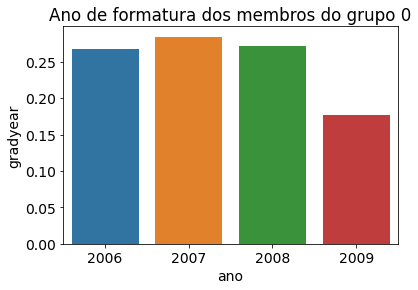

In [44]:
import seaborn as sns
x = df[df['label'] == 0]['gradyear'].value_counts(normalize=True).to_frame()
x['ano'] = x.index
sns.barplot(x="ano", y="gradyear", data=x).set_title('Ano de formatura dos membros do grupo 0')

Text(0.5, 1.0, 'Ano de formatura dos membros do grupo 1')

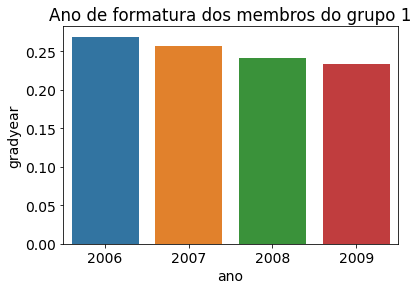

In [45]:
x = df[df['label'] == 1]['gradyear'].value_counts(normalize=True).to_frame()
x['ano'] = x.index
sns.barplot(x="ano", y="gradyear", data=x).set_title('Ano de formatura dos membros do grupo 1')

Text(0.5, 1.0, 'Ano de formatura dos membros do grupo 2')

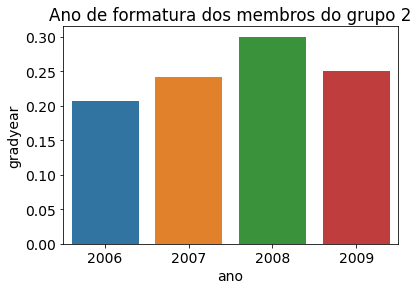

In [46]:
x = df[df['label'] == 2]['gradyear'].value_counts(normalize=True).to_frame()
x['ano'] = x.index
sns.barplot(x="ano", y="gradyear", data=x).set_title('Ano de formatura dos membros do grupo 2')

Text(0.5, 1.0, 'Ano de formatura dos membros do grupo 3')

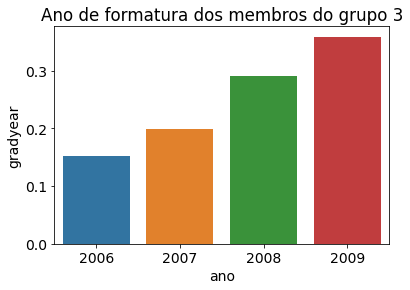

In [47]:
x = df[df['label'] == 3]['gradyear'].value_counts(normalize=True).to_frame()
x['ano'] = x.index
sns.barplot(x="ano", y="gradyear", data=x).set_title('Ano de formatura dos membros do grupo 3')

Text(0.5, 1.0, 'Ano de formatura dos membros do grupo 5')

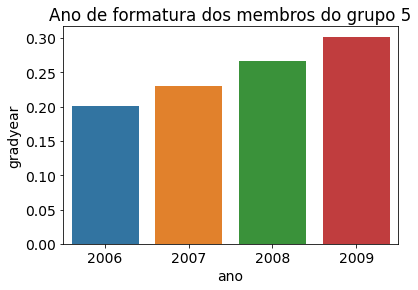

In [48]:
x = df[df['label'] == 5]['gradyear'].value_counts(normalize=True).to_frame()
x['ano'] = x.index
sns.barplot(x="ano", y="gradyear", data=x).set_title('Ano de formatura dos membros do grupo 5')

# Questões

Discuta no seu grupo:

1. Por que criar clusters usando algoritmos de machine learning? Não poderíamos criar de forma manual? 

2. Que grupos foram crescendo ao longo dos anos? Quais eram os principais assuntos tratados por estes grupos? 

3. Este é um exemplo de modelagem não supervisionada. Quais são as principais diferenças entre modelagem supervisionada e não supervionada? Em termos de processo, métodos para avaliação e formas de entrega? Para responder esta pergunta, considerando os exemplos vistos durante o dia de hoje. 